In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('~/Desktop/SampleProblem[3].txt') #Loading data into a dataframe for easier manipulation
df.columns=['Participants', 'Pre', 'Post'] #Changes column names to shorter/easier titles
df 

,Participants,Pre,Post
0,1,75.1,72.3
1,2,89.4,90.2
2,3,102.5,98.4
3,4,98.1,99.8
4,5,61.2,59.2
5,6,78.4,78.2
6,7,103.5,0.1
7,8,89.2,91.3
8,9,93.2,94.5
9,10,114.7,111.8


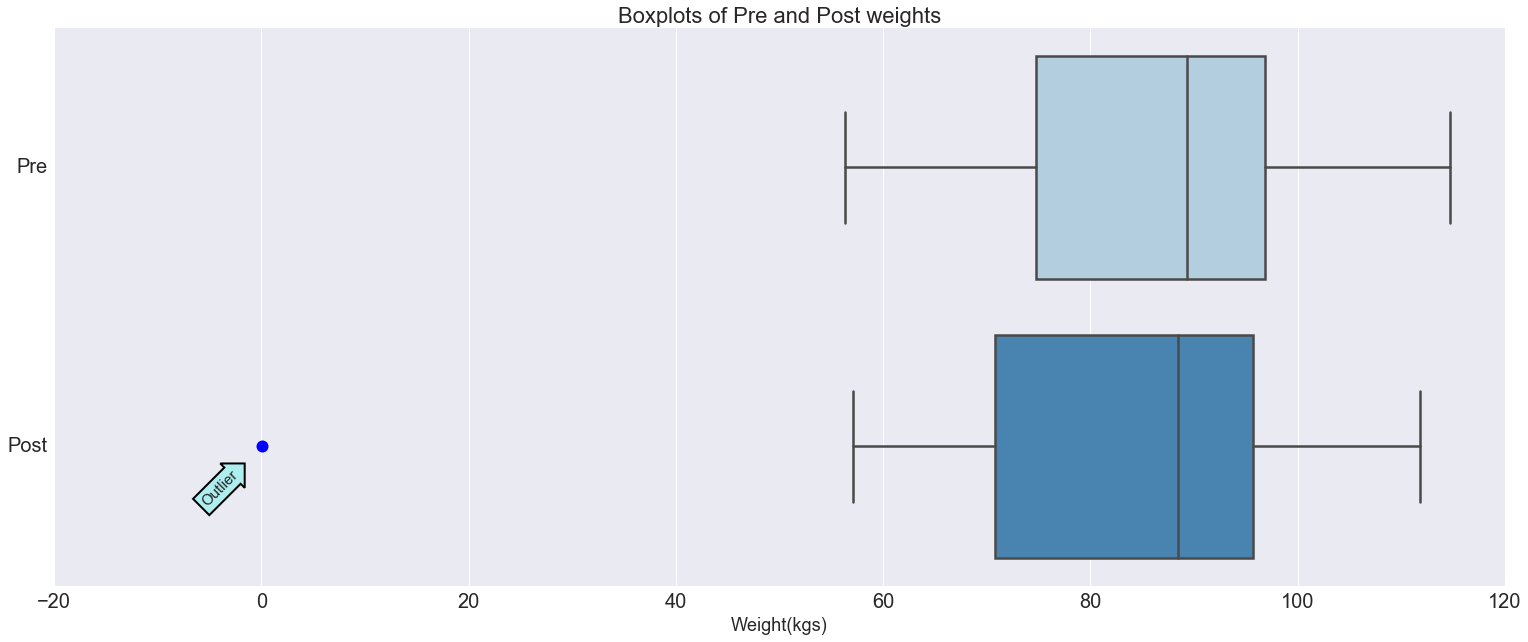

In [3]:
fig = plt.figure(figsize=(26,10))
flierprops = dict(marker='o', markersize=12)
ax = sns.boxplot(x=(df[['Pre','Post']]), data=df, linewidth=2.5, vert=False, flierprops = flierprops, palette= "Blues")


#ax = sns.boxplot(x=(df[['Pre','Post']]), data=df, linewidth=2.5, vert=False, 
ax.set_xlim(-20,120)
ax.tick_params(labelsize=20)
ax.set_xlabel('Weight(kgs)', fontsize=18)
ax.set_xlim(-20,120)
ax.set_title('Boxplots of Pre and Post weights', fontsize=22)
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="paleturquoise", ec="k", lw=2)
t = ax.text(-4, 1.15, "Outlier", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)
plt.show()
fig.savefig('Boxplot_outlier.png')


In [4]:
df_copy = df #Discovered an outlier at .1 kg in the Post data set. This is definitly an outlier. 
df_copy
df_copy = df_copy.drop([6],axis=0) #Getting rid of pre & post data for Participant 7.
df_copy

,Participants,Pre,Post
0,1,75.1,72.3
1,2,89.4,90.2
2,3,102.5,98.4
3,4,98.1,99.8
4,5,61.2,59.2
5,6,78.4,78.2
7,8,89.2,91.3
8,9,93.2,94.5
9,10,114.7,111.8
10,11,73.6,73.4


In [5]:
df_copy['Participants'] = np.arange(1, 20, 1) 
#Resetting the participant numbers to go from 1-19 as we now only have 19 participants. 

In [6]:
df_copy = df_copy.set_index('Participants') #Setting index to participant numbers. 

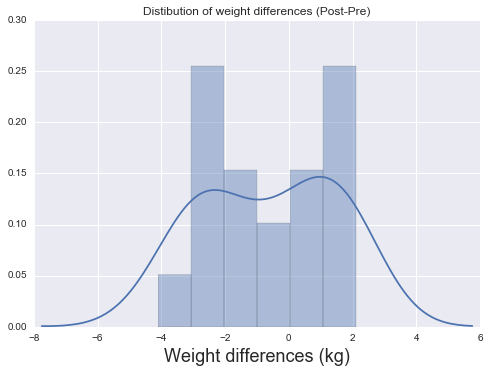

In [7]:
#Data is normal. I'm thinking about running a paired Student's t-test, but I need to make sure its assumptions are met. 
##1. The dependent variable is continuous. 2. The independent variable consists of two related groups. 
##3. There should be no outliers. 4. The distribution of differences of weight (Pre - Post ) should be
##approximately normally distributed. I will now check this 4th assumption. 
df_copy['Post - Pre']=df_copy.Post - df_copy.Pre #creating a new column of differences
diff = df_copy['Post - Pre']
diff1 = sns.distplot(diff, bins=6)
diff1.set_title('Distibution of weight differences (Post-Pre)')
diff1.set_xlabel('Weight differences (kg)', fontsize=18)

In [8]:
#Difference data looks approximately normal.
#Double checking for normality of difference weight data using a Shapiro-Wilk test
shap_diff = stats.shapiro(diff) 
print """The t stat is %f and the pvalue is %f for the weight difference after the intervention.
We FAIL TO REJECT the null hypothesis that the data are from a normally distributed population."""  % shap_diff

The t stat is 0.905066 and the pvalue is 0.060135 for the weight difference after the intervention.
We FAIL TO REJECT the null hypothesis that the data are from a normally distributed population.


In [9]:
a = df_copy.Pre
b = df_copy.Post

In [10]:
#The data is approximately normally distrubuted so to compare the pre and post data I will use a two-tailed Student's t-test. 

print "Running a paired t-test"
ttest = stats.ttest_rel(a,b)

Running a paired t-test


In [11]:
print """The t stat is %f and the pvalue is %f for the paired Student's t-test."
We FAIL TO REJECT the null hypothesis that the mean weight difference after intervention is 0."""  % ttest

The t stat is 1.329491 and the pvalue is 0.200291 for the paired Student's t-test."
We FAIL TO REJECT the null hypothesis that the mean weight difference after intervention is 0.


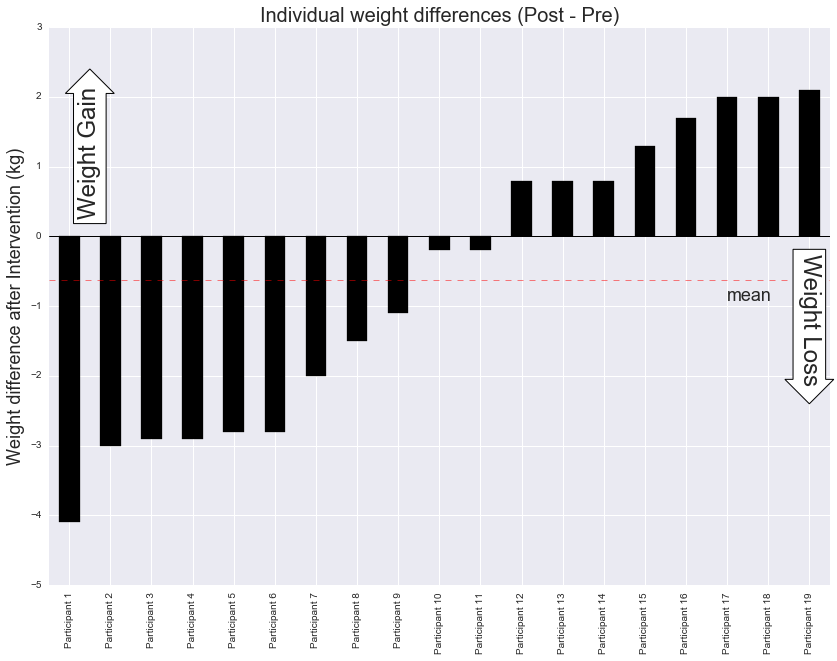

In [12]:
#Plotting the weight difference after the intervention for each individual in a sorted manner (lowest to highest)

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

z1 = diff.mean()

diff.sort_values().plot(kind='bar', color='black')

ax.axhline(y=z1, xmin=0, xmax=19, linewidth=.5, color = 'r', linestyle='dashed')
ax.annotate('mean', xy=(16, -3.8), xytext=(16,(z1-.3)), fontsize=18)
ax.axhline(y=0, xmin=0, xmax=19, linewidth=1, color = 'k')
ax.set_title('Individual weight differences (Post - Pre)', fontsize=20)
ax.set_ylabel('Weight difference after Intervention (kg)', fontsize=18)
ax.set_xlabel('', fontsize=18)
xTickMarks = ['Participant '+ str(i) for i in np.arange(1,20)]
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
plt.setp(xtickNames, rotation=90, fontsize=10)
bbox_props = dict(boxstyle="rarrow,pad=0.2", fc="white", ec="k", lw=1)
t = ax.text(.5, 1.2, "Weight Gain", ha="center", va="center", rotation=90,
            size=24,
            bbox=bbox_props)
t1 = ax.text(18, -1.2, "Weight Loss", ha="center", va="center", rotation=270,
            size=24,
            bbox=bbox_props)
plt.show()
fig.savefig('Individual_weight_diff.png')

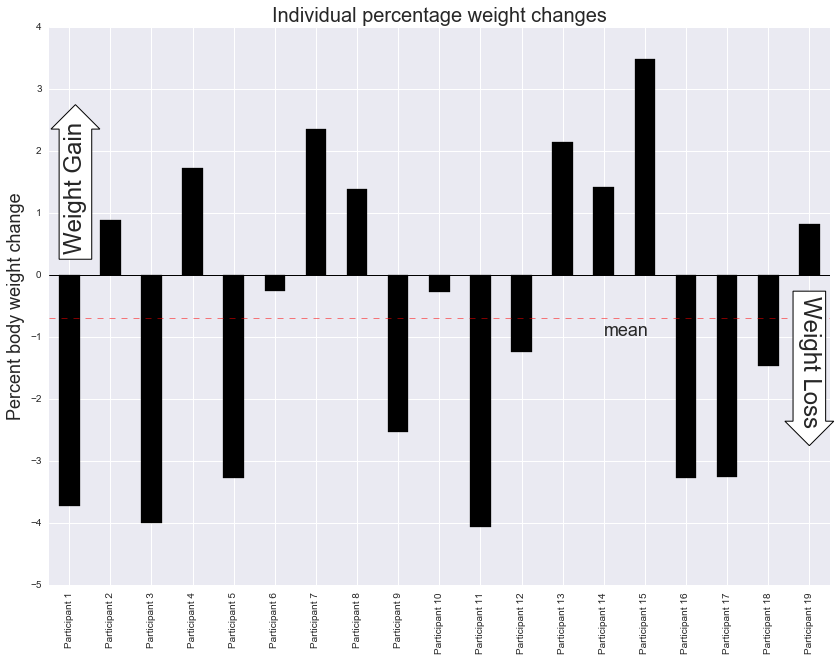

In [13]:
#Since everybody has a different starting weight I wanted to express body weight difference as a function of
#each person's starting bodyweight.

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

df_copy['Percent_change'] = ((df_copy['Post'] - df_copy['Pre']) / df_copy['Pre']) *100
z = df_copy['Percent_change'].mean()
h = df_copy['Percent_change'].std()

df_copy.Percent_change.plot(kind='bar', color='black')

ax.axhline(y=z, xmin=0, xmax=19, linewidth=.5, color = 'r', linestyle='dashed')
ax.annotate('mean', xy=(16, -3.8), xytext=(13,(z-.3)), fontsize=18)
ax.axhline(y=0, xmin=0, xmax=19, linewidth=1, color = 'k')
ax.set_title('Individual percentage weight changes', fontsize=20)
ax.set_ylabel('Percent body weight change', fontsize=18)
ax.set_xlabel('', fontsize=18)
xTickMarks = ['Participant '+ str(i) for i in np.arange(1,20)]
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
plt.setp(xtickNames, rotation=90, fontsize=10)
bbox_props = dict(boxstyle="rarrow,pad=0.2", fc="white", ec="k", lw=1)
t = ax.text(.15, 1.4, "Weight Gain", ha="center", va="center", rotation=90,
            size=24,
            bbox=bbox_props)
t1 = ax.text(18, -1.4, "Weight Loss", ha="center", va="center", rotation=270,
            size=24,
            bbox=bbox_props)
plt.show()
fig.savefig('Indiv_percent_weights.png')

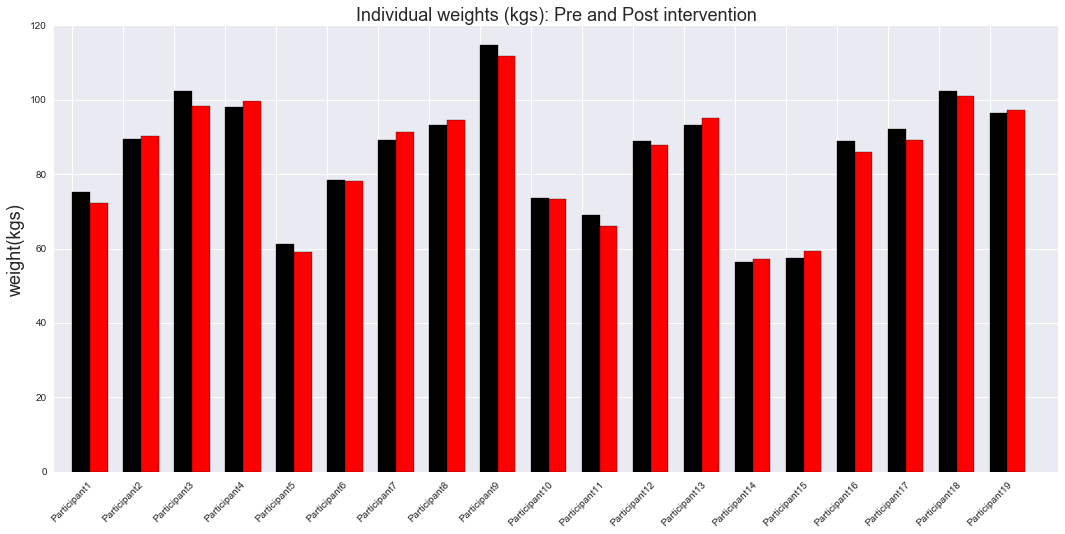

In [14]:
#Plotting pre and post weights for each individuals 

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
width = .35

mean_a = df_copy['Pre']
mean_b = df_copy['Post']

ind = np.arange(len(mean_a))

bar_pre = plt.bar(ind, mean_a, width, color = 'black')
bar_post = plt.bar(ind+width, mean_b, width, color = 'red')

ax.set_title('Individual weights (kgs): Pre and Post intervention', fontsize=18)
xTickMarks = ['Participant'+str(i) for i in np.arange(1,20)]
ax.set_xticks(ind)
ax.set_xlim(-width,len(ind)+width)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=8)
ax.set_ylabel('weight(kgs)', fontsize=18)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.show()
fig.savefig('pre_post_bar.png')